In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from datasets import MyDataset, get_mnist
from gan import GAN

In [2]:
dev = torch.device('cuda')
train_data, _, _, _ = get_mnist()
train_data /= 255

In [3]:
# number = 7
# train_numbers = train_data[train_labels == number]
# number_labels = np.reshape(train_labels[train_labels == number], (-1, 1))
data = MyDataset(train_data)
m = GAN(device=dev)
m.fit(data, epochs=16, verbose=True)

epoch 0 -1097.8881046026945 -1114.2908845245838
epoch 1 -1060.8367111384869 -986.7923061549664
epoch 2 -797.020831823349 -1337.4065776467323
epoch 3 -350.58886263892055 -2345.045496404171
epoch 4 -76.14614192023873 -3892.0206631422043
epoch 5 -20.209109249524772 -5128.851045846939
epoch 6 -5.123250964097679 -6838.128726482391
epoch 7 -0.5278400145471096 -8760.671272277832
epoch 8 -8.743928201496601 -8057.464342355728
epoch 9 -0.16436309646815062 -10014.166140556335
epoch 10 -0.08284786343574524 -10476.036420822144
epoch 11 -0.03481346555054188 -11439.0717086792
epoch 12 -0.005141258239746094 -12449.372825622559
epoch 13 -0.0018980540335178375 -13097.827089309692
epoch 14 -1.0973160462453961 -10942.074739933014
epoch 15 -0.03621111810207367 -11144.747685432434


(1, 28, 28)


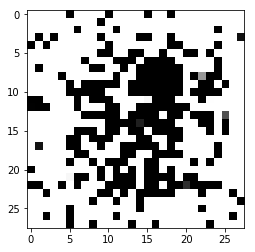

In [4]:
num_gen = 1
noise = torch.rand(num_gen, 256, device=dev)
im = np.reshape(m.generate(noise).cpu().detach().numpy(), (-1, 28, 28))
print(im.shape)
for i in range(num_gen):
    plt.imshow(im[i], cmap='gray')
    plt.show()

In [26]:
from gan import generator_loss

noise2 = torch.rand(1, 256, device=dev)
print(torch.exp(m.predict(m.generate(noise2))))
print(torch.exp(m.predict(data[0:1].to(dev))))
print(generator_loss(m.predict(m.generate(noise2))))
print(generator_loss(m.predict(data[0:1].to(dev))))

tensor([[ 2.6457e-07,  1.0000e+00]], device='cuda:0')
tensor([[ 1.0000e+00,  5.6503e-09]], device='cuda:0')
tensor(0., device='cuda:0')
tensor(-18.9916, device='cuda:0')


In [36]:
np.max(train_data)

1.0